In [33]:
library(data.table)
library(ggplot2)
library(tidyverse)
library(forcats)
library(dplyr)

In [34]:
setwd("C:/Users/Raczysko/Desktop/ML in R/kaggle/Used Cars/data")
auto <-  read.csv2("autos.csv",
               sep = ",",
               header = T,
               encoding = "UTF - 8")

In [35]:
auto$offerType <- NULL
auto$name <- NULL
auto$seller <- NULL
auto$nrOfPictures <- NULL
auto$abtest <- NULL


In [36]:
auto

dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2016-03-24 11:52:17,480,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,18300,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
2016-03-21 18:54:38,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,19348,2016-03-25 16:47:58
2016-04-04 23:42:13,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,,2016-04-04 00:00:00,94505,2016-04-04 23:42:13
2016-03-17 10:53:50,999,kleinwagen,1998,manuell,101,golf,150000,0,,volkswagen,,2016-03-17 00:00:00,27472,2016-03-31 17:17:06


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0     1150     2950    10895     7200 99999999 

90% 
14000

99% 
35999.52

1% 
 0

5% 
200

10% 
500

Warning message:
"Removed 18318 rows containing non-finite values (stat_boxplot)."

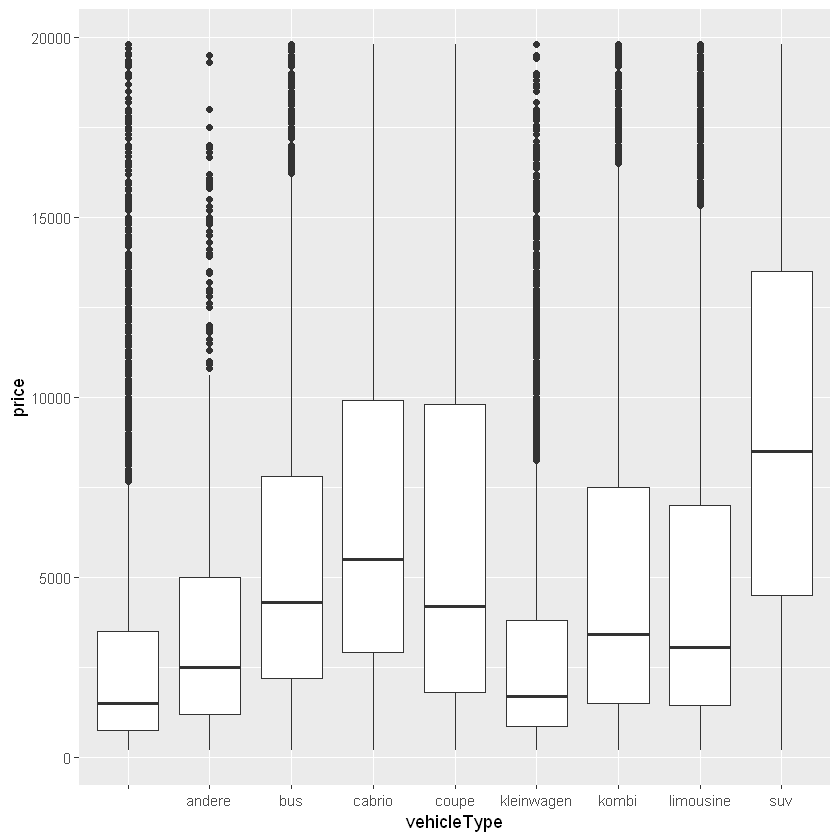

In [37]:
#Price cleaning by transformed it by correcting outliueres with "quantile()". We decided the best choice of limits will be bettwen 0.05 and 0.95.

summary(auto$price)
quantile(auto$price, 0.90)
quantile(auto$price, 0.99)
quantile(auto$price, 0.01)
quantile(auto$price, 0.05)
quantile(auto$price, 0.10)

ggplot(aes(x=vehicleType, y=price), data = auto) + 
  geom_boxplot() +
  ylim(quantile(auto$price, 0.05), quantile(auto$price, 0.95))


p1 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot()

p2 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot() +
  ylim(0, quantile(auto$price, 0.99))

p3 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot() +
  ylim(0, quantile(auto$price, 0.95))

p4 <- ggplot(aes(x="price", y=price), data = auto) + 
  geom_boxplot() +
  ylim(0, quantile(auto$price, 0.90))



Warning message:
"Removed 1894 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 9411 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 18856 rows containing non-finite values (stat_boxplot)."

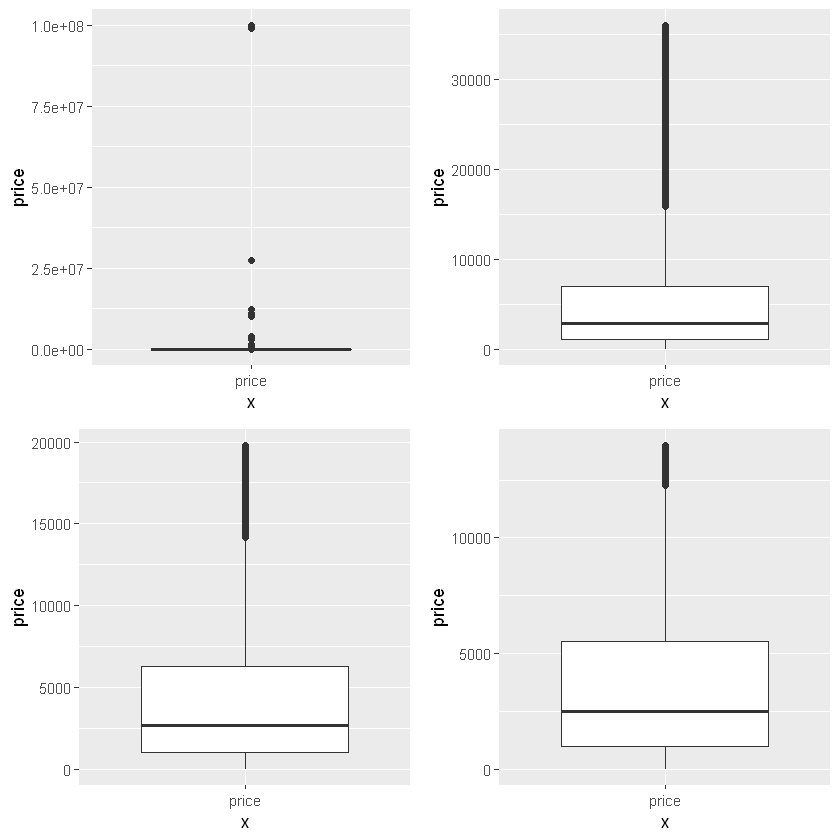

In [38]:
#Engine power cleaning again we use the limits bettwen 0.05 and 0.95 of total observations.
library(gridExtra)
grid.arrange(p1, p2, p3, p4, ncol = 2)

In [39]:
auto  <-  auto[(auto$price > quantile(auto$price, 0.05)) & (auto$price < quantile(auto$price, 0.95)),]

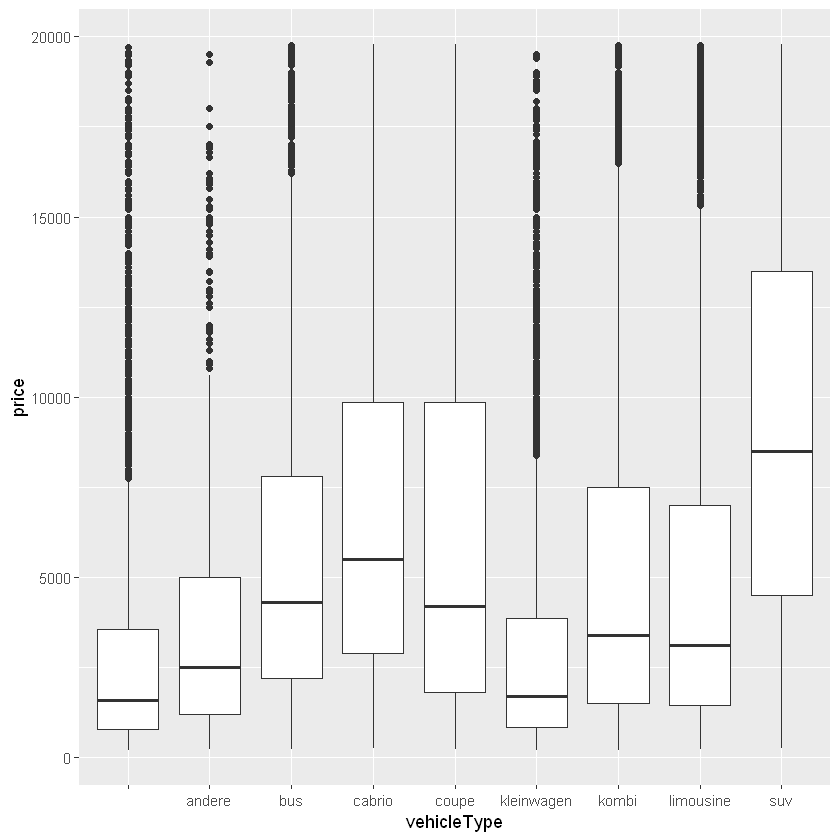

In [40]:
ggplot(aes(x=vehicleType, y=price), data = auto) + 
  geom_boxplot()

In [41]:
summary(auto$powerPS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    72.0   105.0   111.1   143.0 19208.0 

In [42]:
p1 <- ggplot(aes(x=vehicleType, y=powerPS), data = auto) + 
  geom_boxplot()
p2 <- ggplot(aes(x=vehicleType, y=powerPS), data = auto) + 
  geom_boxplot() +
  ylim(quantile(auto$powerPS, 0.05), quantile(auto$powerPS, 0.95))

Warning message:
"Removed 7988 rows containing non-finite values (stat_boxplot)."

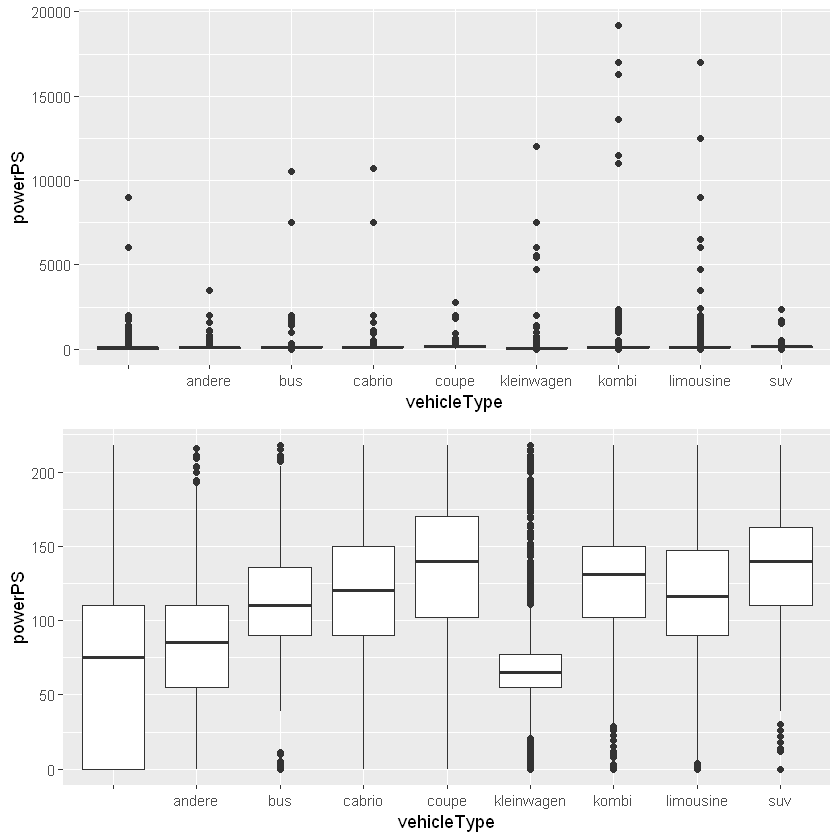

In [43]:
grid.arrange(p1, p2, ncol = 1)

In [44]:
auto  <-  auto[(auto$powerPS > quantile(auto$powerPS, 0.05)) & (auto$powerPS < quantile(auto$powerPS, 0.95)), ]

In [45]:
auto

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2,2016-03-24 10:58:45,18300,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
3,2016-03-14 12:52:21,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
4,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
5,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
6,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
7,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
9,2016-04-04 23:42:13,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,,2016-04-04 00:00:00,94505,2016-04-04 23:42:13
10,2016-03-17 10:53:50,999,kleinwagen,1998,manuell,101,golf,150000,0,,volkswagen,,2016-03-17 00:00:00,27472,2016-03-31 17:17:06
11,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34
12,2016-04-07 10:06:22,2799,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,57290,2016-04-07 10:25:17


In [46]:
#VehicleType cleaning

In [ ]:
summary(auto$vehicleType)
ggplot(auto, aes(x = vehicleType, fill = vehicleType)) + geom_bar()

In [89]:
auto[auto$vehicleType == "",]

dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1800    1999    2003    2003    2008    9999 

Warning message:
"Removed 5693 rows containing non-finite values (stat_boxplot)."

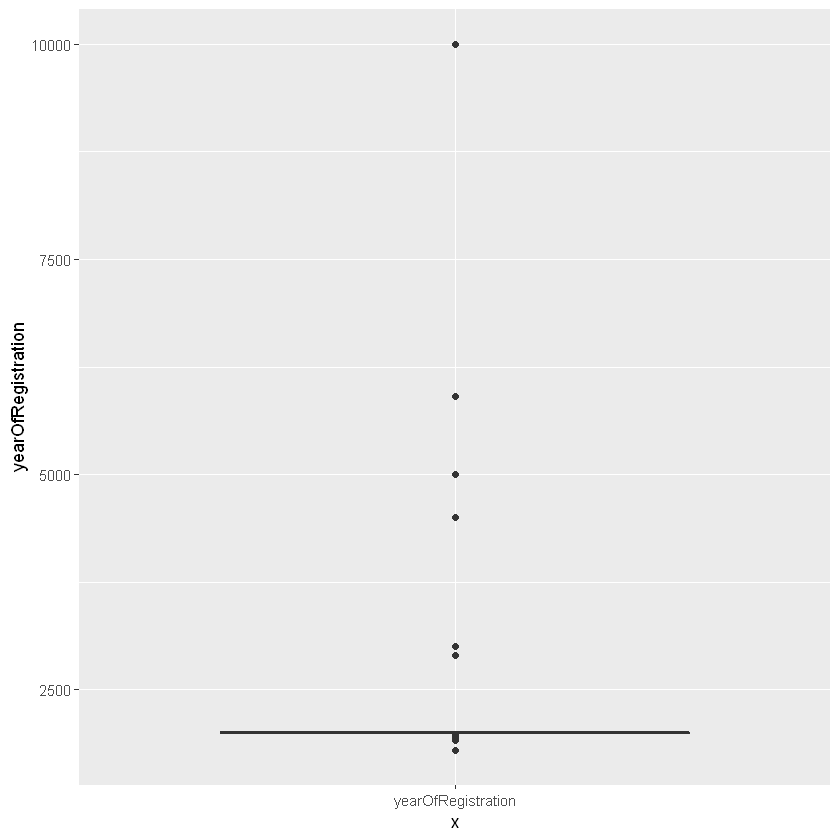

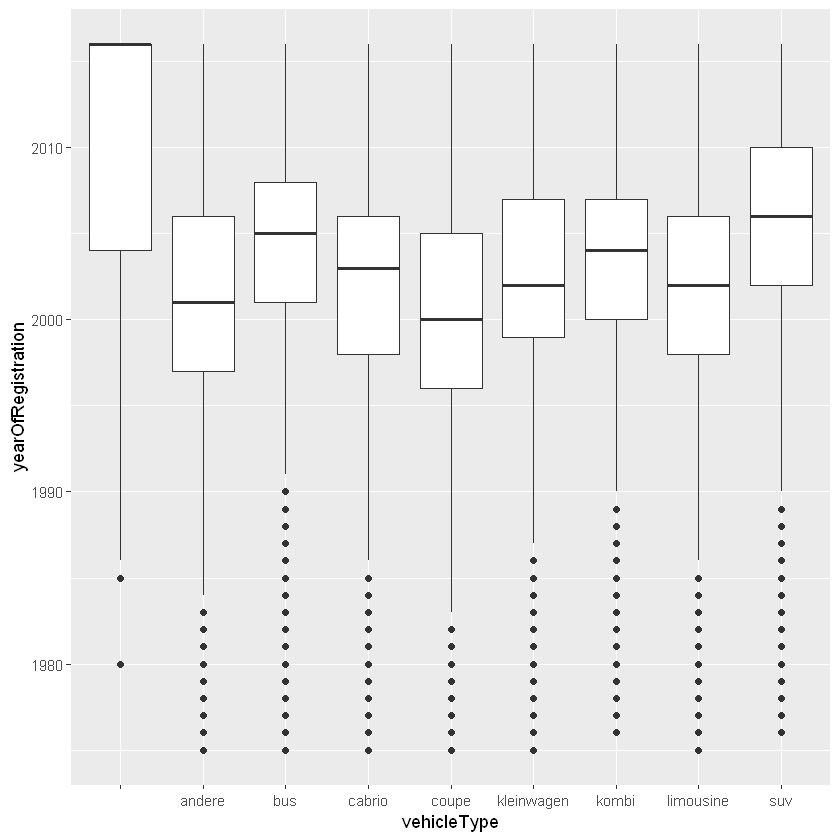

In [49]:
# Year of registration cleaning
summary(auto$yearOfRegistration)
ggplot(aes(x="yearOfRegistration", y=yearOfRegistration), data = auto) + 
  geom_boxplot()
#In summary we can see the max year of registration is 9999 "xD" and the lowest 1800 when 1st car on the world was producet in 1845
#so even if its is the oldest car in the world it's not possible that it were registered in 1800

ggplot(aes(x=vehicleType, y=yearOfRegistration), data = auto) + 
  geom_boxplot() +
  ylim(1975, 2016)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 5693 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 5693 rows containing missing values (geom_point)."

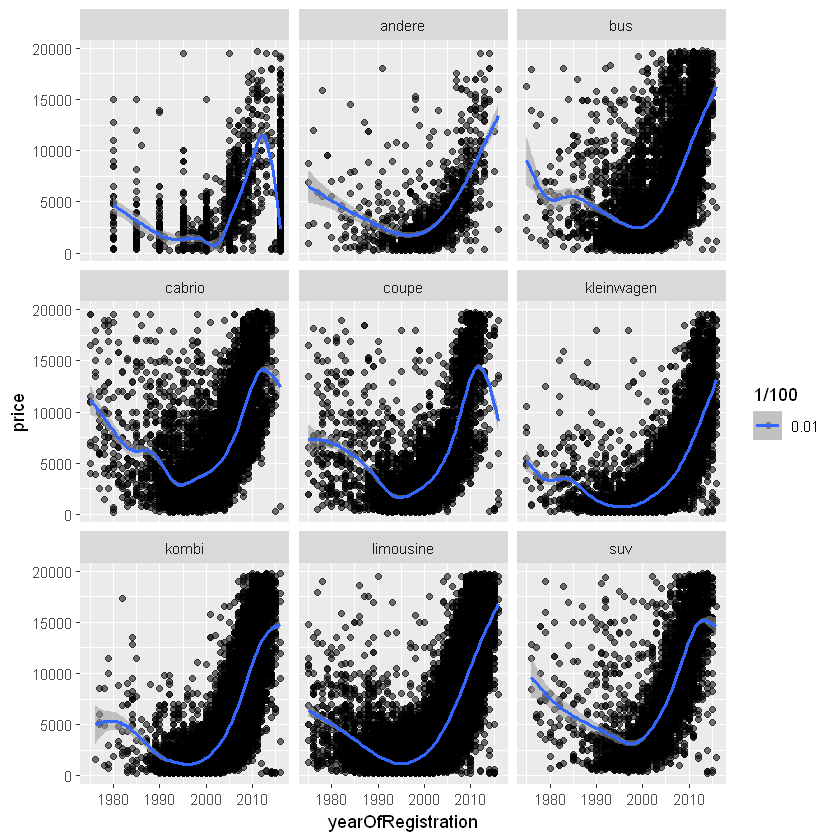

In [50]:
ggplot(aes(x=yearOfRegistration, y=price, alpha = 1/100), data = auto) + 
  geom_point() +
  facet_wrap(~vehicleType) +
  xlim(1975, 2016)+
  geom_smooth()

In [57]:
#Cleaning year of registration
auto <-  auto[(auto$yearOfRegistration >= 1975) & (auto$yearOfRegistration < 2016),]

In [59]:
#Month cleaning data. After cleaning data "yearofRegistration" we can check the "Month". And check the correlation bettwen "Month" and "Year".
summary(auto$monthOfRegistration)
table(auto$monthOfRegistration, auto$yearOfRegistration)
table(auto$monthOfRegistration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   6.000   6.013   9.000  12.000 

    
     1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
  0     4    5    9    8   13   23    8   15   18   14   29   15   31   44   61
  1     1    5    5    4    4   11   10    7   16   17   19   12   15   23   20
  2     4    2    2    7    8    6    5   11   14    7   16    6   17   17   19
  3     3    8    7   17   12    9   15   14   19   19   24   20   21   35   44
  4     1    2    1    6   10    9   12   10    8   20   21   18   25   38   54
  5     4    3    5    6    7   13    7    9   10   20   23   13   20   36   50
  6     4    6    8    8    8   11   11   13   23   10   16   20   20   39   45
  7     8    8    9   15   12   10   15   14   16   14   26   19   31   33   44
  8     6    3    4    4    6    4    4   14    5    7    8   11   19   31   28
  9     3    2    2    9    7    7    6    5   19    9   11   11   19   20   39
  10    3    4    5    5    5    2    4    6    7   16    8   15   20   24   25
  11    1    3    3    7    6    3 


    0     1     2     3     4     5     6     7     8     9    10    11    12 
 7500  9272  8766 14127 11810 11918 12611 10875  9186  9589 10565  9587  9649 

In [68]:
auto$monthOfRegistration[(auto$monthOfRegistration == 0)]  <- NA

In [70]:
table(auto$monthOfRegistration)
str(auto$monthOfRegistration)


    1     2     3     4     5     6     7     8     9    10    11    12 
 9272  8766 14127 11810 11918 12611 10875  9186  9589 10565  9587  9649 

 int [1:135455] 5 8 6 7 10 8 8 NA 12 12 ...


In [90]:
#FUeal type cleaning, we deleted all NA form data Fuealtype because its information that is importatn in choosing used car.
summary(auto$fuelType)
table(auto$vehicleType, auto$fuelType)

andere  benzin     cng  diesel elektro  hybrid     lpg    NA's 
      0      46   85554     250   40574      27      99    1856    4964

            
                   andere benzin   cng diesel elektro hybrid   lpg
                 0      0      0     0      0       0      0     0
  andere         0      7    503     9    556       5      0     7
  bus            0      3   4416   112   8200       0      1   229
  cabrio         0      2   7507     2    650       4      0   105
  coupe          0      1   4730     1    782       1      7   118
  kleinwagen     0      7  29577    35   3065      12     18   209
  kombi          0      7  11642    71  14702       3     12   477
  limousine      0     16  25514    19  10257       2     57   568
  suv            0      3   1665     1   2362       0      4   143

In [91]:
auto$fuelType[(auto$fuelType == "")]  <- NA

In [92]:
#Dependence table bettwen fuelType and vehicleType, where we don't have eme
table(auto$fuelType, auto$vehicleType)

         
                andere   bus cabrio coupe kleinwagen kombi limousine   suv
              0      0     0      0     0          0     0         0     0
  andere      0      7     3      2     1          7     7        16     3
  benzin      0    503  4416   7507  4730      29577 11642     25514  1665
  cng         0      9   112      2     1         35    71        19     1
  diesel      0    556  8200    650   782       3065 14702     10257  2362
  elektro     0      5     0      4     1         12     3         2     0
  hybrid      0      0     1      0     7         18    12        57     4
  lpg         0      7   229    105   118        209   477       568   143

In [94]:
#Brand checking to clan. We can see 40 of different brand variable. So we need to focus on the most popular brand.

summary(auto$brand)
table(auto$vehicleType, auto$fuelType)

alfa_romeo           audi            bmw      chevrolet       chrysler 
           909          10731          13167            631            453 
       citroen          dacia         daewoo       daihatsu           fiat 
          2026            400            189            277           3573 
          ford          honda        hyundai         jaguar           jeep 
          9516           1106           1482             90            213 
           kia           lada         lancia     land_rover          mazda 
          1020             62            171            197           2227 
 mercedes_benz           mini     mitsubishi         nissan           opel 
         11178           1431           1115           1856          15107 
       peugeot        porsche        renault          rover           saab 
          4628             89           6582            172            199 
          seat          skoda          smart sonstige_autos         subaru 
          2696           2460           2312            577            262 
        suzuki         toyota        trabant     volkswagen          volvo 
           946           1946            112          29921           1341

            
                   andere benzin   cng diesel elektro hybrid   lpg
                 0      0      0     0      0       0      0     0
  andere         0      7    503     9    556       5      0     7
  bus            0      3   4416   112   8200       0      1   229
  cabrio         0      2   7507     2    650       4      0   105
  coupe          0      1   4730     1    782       1      7   118
  kleinwagen     0      7  29577    35   3065      12     18   209
  kombi          0      7  11642    71  14702       3     12   477
  limousine      0     16  25514    19  10257       2     57   568
  suv            0      3   1665     1   2362       0      4   143

In [98]:
#Gearbox cleanign from empty data.
summary(auto$gearbox)
table(auto$gearbox, auto$vehicleType)

automatik   manuell 
     1970     22399    109001

           
                  andere   bus cabrio coupe kleinwagen kombi limousine   suv
                0     32   149    175    84        771   308       412    39
  automatik     0    103  1918   1547  1198       2699  6413      7242  1279
  manuell       0   1041 11207   6819  4579      30938 21360     30091  2966

In [103]:
auto <- auto[(auto$gearbox)!= "",]

In [104]:
summary(auto$gearbox)

automatik   manuell 
        0     22399    109001

In [106]:
summary(auto$model)

golf      andere         3er        polo       corsa      passat 
      11282        8662        7761        4954        4589        4282 
      astra          a4                c_klasse         5er          a3 
       4226        4101        4037        3378        2517        2470 
   e_klasse       focus      fiesta     2_reihe transporter          a6 
       2417        2345        2206        2166        2012        1797 
     twingo      fortwo      vectra         1er    a_klasse     3_reihe 
       1680        1622        1619        1590        1551        1419 
     touran      mondeo        clio      zafira       punto      megane 
       1415        1402        1332        1238        1205        1132 
      ibiza        lupo     octavia       fabia          ka      cooper 
       1084        1028         963         936         899         892 
      caddy       micra          80      sharan     6_reihe      scenic 
        629         620         597         596         550         549 
    i_reihe      laguna         clk       omega     1_reihe        leon 
        548         542         528         526         518         504 
      civic    mx_reihe         slk       yaris      galaxy      meriva 
        487         464         460         456         453         401 
        one          tt         500        vito        bora    b_klasse 
        397         381         378         376         369         365 
    x_reihe      beetle        colt      kangoo    berlingo         v40 
        365         345         345         340         339         334 
        fox       arosa       tigra      tiguan     transit    sprinter 
        325         321         319         301         295         285 
      c_max      escort          a1       swift         v70     4_reihe 
        283         282         281         277         273         271 
      panda     corolla     qashqai     avensis     z_reihe         eos 
        268         259         255         254         254         249 
   insignia    scirocco         147    seicento          c3       stilo 
        246         245         240         236         230         226 
        156       s_max     primera      almera      espace          c4 
        223         222         219         216         202         201 
      grand      signum          c5     (Other) 
        197         193         192       11089

In [108]:
auto <- auto[(auto$model)!= "",]

In [110]:
summary(auto$model)

golf      andere         3er        polo       corsa      passat 
      11282        8662        7761        4954        4589        4282 
      astra          a4    c_klasse         5er          a3    e_klasse 
       4226        4101        3378        2517        2470        2417 
      focus      fiesta     2_reihe transporter          a6      twingo 
       2345        2206        2166        2012        1797        1680 
     fortwo      vectra         1er    a_klasse     3_reihe      touran 
       1622        1619        1590        1551        1419        1415 
     mondeo        clio      zafira       punto      megane       ibiza 
       1402        1332        1238        1205        1132        1084 
       lupo     octavia       fabia          ka      cooper       caddy 
       1028         963         936         899         892         629 
      micra          80      sharan     6_reihe      scenic     i_reihe 
        620         597         596         550         549         548 
     laguna         clk       omega     1_reihe        leon       civic 
        542         528         526         518         504         487 
   mx_reihe         slk       yaris      galaxy      meriva         one 
        464         460         456         453         401         397 
         tt         500        vito        bora    b_klasse     x_reihe 
        381         378         376         369         365         365 
     beetle        colt      kangoo    berlingo         v40         fox 
        345         345         340         339         334         325 
      arosa       tigra      tiguan     transit    sprinter       c_max 
        321         319         301         295         285         283 
     escort          a1       swift         v70     4_reihe       panda 
        282         281         277         273         271         268 
    corolla     qashqai     avensis     z_reihe         eos    insignia 
        259         255         254         254         249         246 
   scirocco         147    seicento          c3       stilo         156 
        245         240         236         230         226         223 
      s_max     primera      almera      espace          c4       grand 
        222         219         216         202         201         197 
     signum          c5        aygo     (Other) 
        193         192         190       10899

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5000  125000  150000  127815  150000  150000 

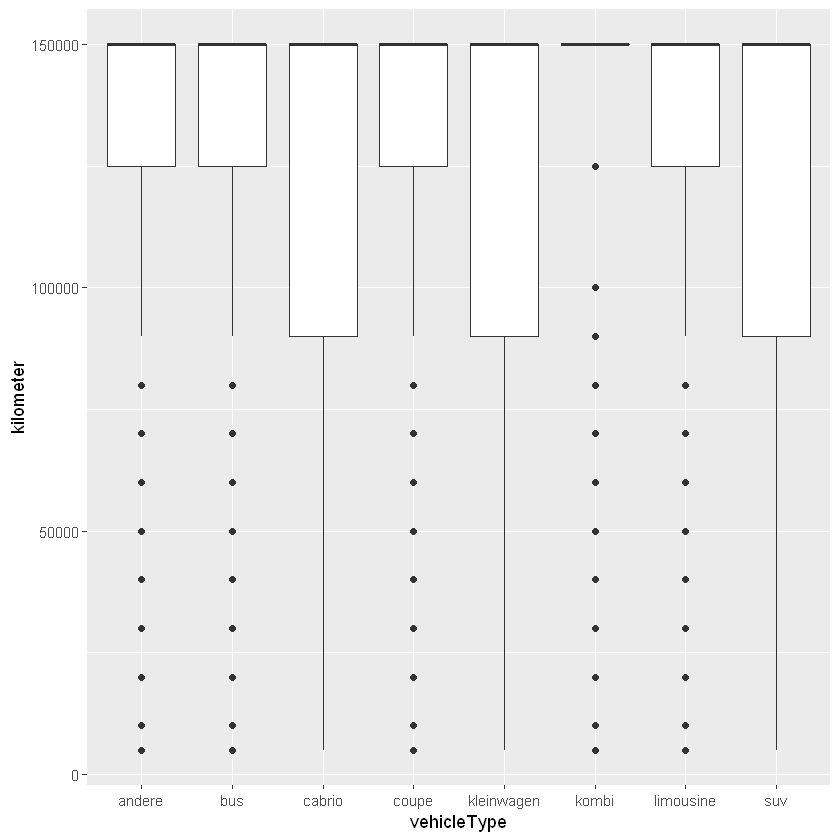

In [112]:
summary(auto$kilometer)
ggplot(aes(x=vehicleType, y=kilometer), data = auto) + 
  geom_boxplot()

In [114]:
summary(auto$notRepairedDamage)
table(auto$notRepairedDamage)

ja   nein 
 15493  11608 100262


           ja   nein 
 15493  11608 100262 

In [116]:
auto <-  auto[(auto$notRepairedDamage != ""),]

In [122]:
table(auto$notRepairedDamage)


    no    yes 
100262  11608 

In [123]:
auto$notRepairedDamage <-  ifelse(auto$notRepairedDamage == "ja", "yes", "no")

In [126]:
#We added a new variable "Selling time" into the dataset. Which show us how old is the car.
auto$sellingTime <-  as.integer(as.Date(auto$lastSeen) - as.Date(auto$dateCreated))

In [129]:
str(auto$sellingTime)
summary(auto$sellingTime)
table(auto$sellingTime)

 int [1:111870] 0 6 2 4 11 0 2 16 17 13 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   6.000   8.999  14.000 384.000 


    0     1     2     3     4     5     6     7     8     9    10    11    12 
14272  6390 11931  5577  8471  3941  6326  3910  5382  4118  2908  3989  2878 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 2799  2726  2425  2187  1939  2334  1539  1107  1812  1889  1296  1379  1147 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
 1322  1259   972  1179   802   937   204   380    12    28     6     4     8 
   39    40    41    42    43    44    45    46    47    48    49    51    54 
    4     3     5     4     2     3     2     5     4     3     3     6     1 
   55    57    58    59    60    61    62    65    68    69    71    72    80 
    1     1     3     6     1     2     4     1     2     1     1     1     1 
   88    89    91    94    95    96    98   108   110   135   146   193   239 
    1     1     1     1     1     1     1     1     1     1     1     2     1 
  384 
    1 

In [ ]:
auto[()]